In [ ]:
# simulation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pysta
import stc
import stcl
%load_ext autoreload
%autoreload 2

In [23]:
num_samples = 1000
dim = 5

center1 = 2*np.ones((1,dim))
X1 = np.random.randn(num_samples, dim) + center1
center2 = -2*np.ones((1,dim))
X2 = np.random.randn(num_samples, dim) + center2

X = np.concatenate([X1, X2])
X.shape

(2000, 5)

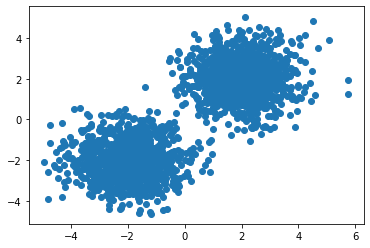

In [24]:
plt.scatter(X[:,0], X[:,1])

In [17]:
X.shape

(2, 1000, 5)

In [48]:
# center of all
center = np.mean(X, axis=0, keepdims=True)

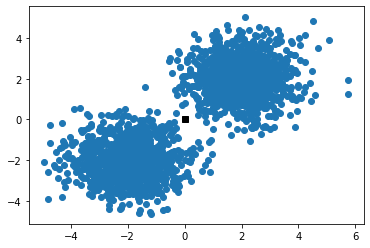

In [49]:
plt.scatter(X[:,0], X[:,1])
plt.plot(center[:,0], center[:,1], "sk")

## PCA?

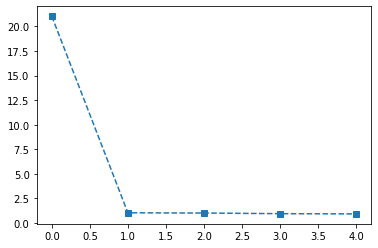

In [50]:

cov = stc.calc_covariance_matrix(X-center, centered=True)

eig_values, eig_vectors = stc.calc_eig_values_and_vectors(cov)


# my code 
plt.plot(eig_values, "s--")

In [51]:
# 1st eigenvector
eig_vectors[:,0]

array([0.44303343, 0.45118344, 0.44481936, 0.44693877, 0.45004041])

In [52]:
# projection
projected = stc.project(X-sta, eig_vectors)

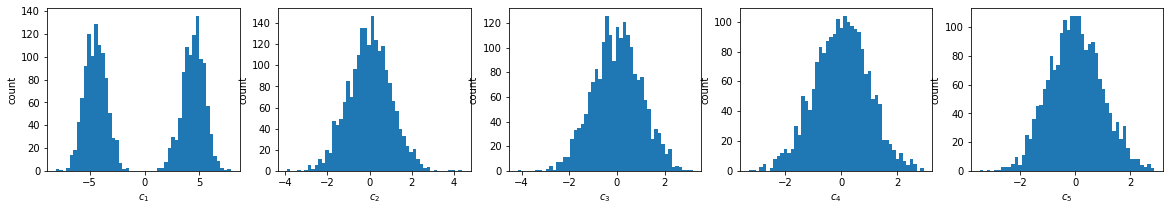

In [53]:
# projected scores 
num_figs = 5
plt.figure(figsize=(4*num_figs, 3))
for i in range(num_figs):
    plt.subplot(1, num_figs, i+1)
    plt.hist(projected[:,i], 50)
    plt.xlabel("$c_{}$".format(i+1))
    plt.ylabel('count')

Text(0.5, 0, 'dimension')

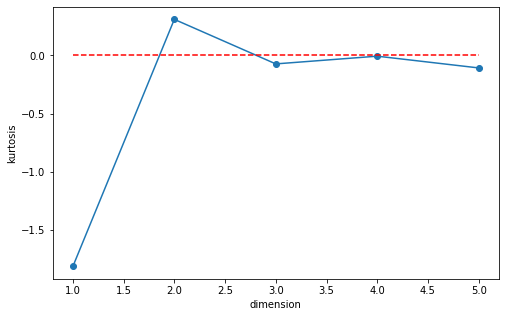

In [63]:
# kurtosis
# calc & plot kurtosis
from scipy.stats import kurtosis

Ks = list()
dim = projected.shape[1]
for i in range(dim):    
    Ks.append(kurtosis(projected[:,i]))

plt.figure(figsize=(8,5))
# plt.subplot(121)
plt.plot(np.linspace(1,dim,dim), Ks, 'o-')
plt.plot([1,dim], [0,0], 'r--')
plt.ylabel('kurtosis')
plt.xlabel('dimension')

# plt.subplot(122)
# plt.plot(np.linspace(1,dim,dim), Ks, 'o-')
# plt.plot([0,dim], [0,0], 'r--')
# plt.xlim(0, 10)
# plt.ylabel('kurtosis')
# plt.xlabel('dimension') 

# plt.savefig("{}_kurtosis.pdf".format(channel_name))

projected center [[0. 0.]]
projected sta [[0. 0.]]
projected zeros [[-0.00572608 -0.02026923]]
projected sta [[ 1.11228162 -0.01644904]]
projected ones [[ 2.23028931 -0.01262885]]


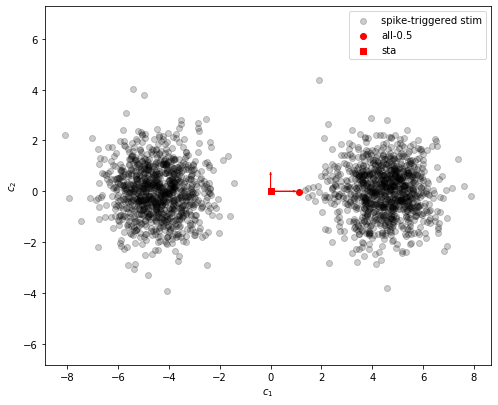

In [57]:
projected_center = stc.project(center-center, eig_vectors)
print("projected center", projected_center[:,0:2])

projected_sta = stc.project(sta.reshape([1,dim])-center, eig_vectors) # + pca.transform(center)
print("projected sta", projected_sta[:,0:2])

projected_zeros = stc.project(np.zeros([1,dim])-center, eig_vectors) # + pca.transform(center)
print("projected zeros", projected_zeros[:,0:2])

projected_halfs = stc.project(0.5*np.ones([1,dim])-center, eig_vectors) # + pca.transform(center)
print("projected sta", projected_halfs[:,0:2])

projected_ones = stc.project(np.ones([1,dim])-center, eig_vectors) # + pca.transform(center)
print("projected ones", projected_ones[:,0:2])


fig = plt.figure(figsize=(8,6.6))
ax = fig.add_subplot(111, aspect='equal')

plt.scatter(projected[:,0], projected[:,1], c='k', alpha=0.2)
#plt.scatter(projected[:,0], projected[:,1], alpha=0.2)

plt.xlabel("$c_1$")
plt.ylabel("$c_2$")
    

# plt.scatter(projected_zeros[:,0], projected_zeros[:,1], c='r', marker='^')
plt.scatter(projected_halfs[:,0], projected_halfs[:,1], c='r', marker='o')
# plt.scatter(projected_ones[:,0], projected_ones[:,1], c='r', marker="v")

plt.scatter(projected_sta[:,0], projected_sta[:,1], c='r', marker="s")

plt.legend(["spike-triggered stim", "all-0.5", "sta"])
# plt.legend(["spike-triggered stim", "all-zero", "all-0.5", "all-one", "sta"])
plt.axis('tight')
plt.axis('equal')

x = projected_center[0][0]
y = projected_center[0][1]
ax.arrow(x, y, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='r', ec='r')
ax.arrow(x, y, 0, 0.75, head_width=0.05, length_includes_head=True, head_length=0.1, fc='r', ec='r')



# plt.savefig("{}_pca.png".format(channel_name))

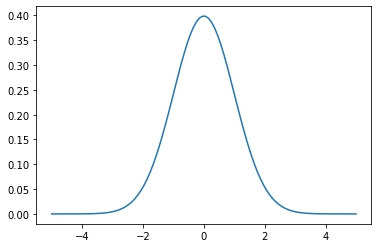

In [69]:
from scipy.stats import norm

# normalized normal random variable
rv = norm()

z = np.linspace(-5,5,100)
plt.plot(z, rv.pdf(z))

([array([0.01379848, 0.01379848, 0.01379848, 0.01379848, 0.        ,
         0.        , 0.        , 0.01379848, 0.        , 0.04139545,
         0.01379848, 0.        , 0.02759697, 0.05519393, 0.04139545,
         0.        , 0.0827909 , 0.04139545, 0.        , 0.04139545,
         0.04139545, 0.13798483, 0.09658938, 0.17938028, 0.12418635,
         0.13798483, 0.23457421, 0.16558179, 0.23457421, 0.23457421,
         0.27596966, 0.27596966, 0.23457421, 0.33116359, 0.33116359,
         0.24837269, 0.28976814, 0.400156  , 0.30356662, 0.46914842,
         0.46914842, 0.34496207, 0.38635752, 0.34496207, 0.400156  ,
         0.41395449, 0.31736511, 0.34496207, 0.37255904, 0.37255904,
         0.400156  , 0.23457421, 0.27596966, 0.41395449, 0.26217118,
         0.38635752, 0.19317876, 0.28976814, 0.17938028, 0.22077573,
         0.12418635, 0.17938028, 0.22077573, 0.20697724, 0.12418635,
         0.0827909 , 0.11038786, 0.20697724, 0.16558179, 0.06899241,
         0.05519393, 0.0827909 , 0

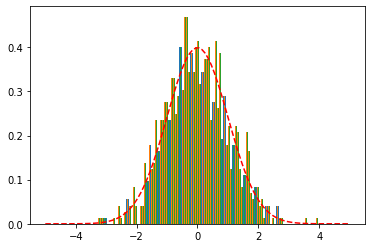

In [81]:
num_samples = 1000
r = norm.rvs(size=num_samples)
plt.plot(z, rv.pdf(z), 'r--')
plt.hist(r, 100, density = True)
plt.hist([r, r], 100, density = True) 

array([ 1.62147789, -1.08824717,  0.49089061, ..., -0.68815325,
        0.69132648,  0.50133392])